This dataset includes reviews for restaurants located in New York City. Reviews include product and user id, timestamp, ratings, and a plaintext review. Yelp has a filtering algorithm in place that identifies fake/suspicious reviews and separates them into a filtered list. This Yelp dataset contains both recommended and filtered reviews. We consider them as genuine and fake, respectively. Your goal is to predict whether a review is fake or not, i.e. a binary classification task. The positive classes (+1) are fake reviews and the negative classes are genuine reviews (0). Note that the classes are imbalanced, with around 10% fake reviews.

In [1]:
#ToDo:
#POS tagging in preprocessing and visual
#problems with average word length  - KeyError
#Feature Extraction: Word2Vec, Bart, Glove, etc.
#Imbalanced Classes
#Modeling

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'train.csv', sep=','))
dev = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'dev.csv', sep=','))

In [5]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

In [6]:
X_val = dev.drop(['label'], axis=1)
y_val = dev['label']

### Preprocessing

convert to lower case, remove punctuation from each word, remove remaining tokens that are not alphabetic, filter out stop words.

Pretty slow; maybe look into spaCy instead.

https://realpython.com/natural-language-processing-spacy-python/

```python
!pip install spacy 
!python -m spacy download en

import spacy
nlp = spacy.load('en_core_web_sm')
```

Comparing the two:

https://towardsdatascience.com/text-preprocessing-steps-and-universal-pipeline-94233cb6725a

In [7]:
# import the necessary libraries 
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/amandarella/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [8]:
def addDomainFeatures(data):

    length = []
    for i in data.index:
        length.append(len(data['review'][i].split(' ')))
        
    numbers = []
    for i in data.index:
        alph = list(filter(str.isdigit, data['review'][i]))  
        if len(alph) == 0:
            numbers.append(0)
        else:
            numbers.append(sum(map(str.isdigit, alph)) / len(alph))
        
    caps = []
    for i in data.index:
        alph = list(filter(str.isalpha, data['review'][i]))  
        if len(alph) == 0:
            caps.append(0)
        else:
            caps.append(sum(map(str.isupper, alph)) / len(alph))
        
    num_sent = []
    for i in data.index:
        num_sent.append(len(data['review'][i].split('.')))
        
    data['length'] = length
    data['numbers'] = numbers
    data['caps'] = caps
    data['num_sent'] = num_sent
        
#   #avg word length 
    data['avg_words'] = pd.Series()
    for i in data.index:
        words = data['review'][i].split(' ')
        if len(words) == 0:
            data['avg_words'][i] = 0
        else:
            data['avg_words'][i] = sum(len(word) for word in words) / len(words)

        #add percents of POS
        
    
    #percent of total user reviews written by the user
    data['perc_tot_user_reviews']=data.groupby('user_id')['user_id'].transform('count')/data.shape[0]


In [9]:
#dates
def addDateInfo(data):
    data['my_dates'] = pd.to_datetime(data['date'])
    data['day_of_week'] = data['my_dates'].dt.day_name()
    data['month'] = data['my_dates'].dt.month
    data['year'] = data['my_dates'].dt.year
    data['week_day'] =data['my_dates'].dt.weekday

In [10]:
#POS tagging - To Do
nltk.pos_tag(X_train['review'][0].split(' '))

[('The', 'DT'),
 ('food', 'NN'),
 ('at', 'IN'),
 ('snack', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('selection', 'NN'),
 ('of', 'IN'),
 ('popular', 'JJ'),
 ('Greek', 'NNP'),
 ('dishes.', 'NN'),
 ('The', 'DT'),
 ('appetizer', 'NN'),
 ('tray', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('as', 'IN'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('Greek', 'JJ'),
 ('salad.', 'NN'),
 ('We', 'PRP'),
 ('were', 'VBD'),
 ('underwhelmed', 'VBN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('main', 'JJ'),
 ('courses.', 'NN'),
 ('There', 'EX'),
 ('are', 'VBP'),
 ('4-5', 'JJ'),
 ('tables', 'NNS'),
 ('here', 'RB'),
 ('so', 'RB'),
 ("it's", 'JJ'),
 ('sometimes', 'RB'),
 ('hard', 'RB'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('seated.', 'JJ')]

In [11]:
# import the necessary libraries 
import nltk 
import string 
import re 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amandarella/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amandarella/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
def preprocessing(data):
    
    for i in range(len(data['review'])):
        tokens = word_tokenize(data['review'][i])

        # convert to lower case
        tokens = [w.lower() for w in tokens]

        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]

        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]

        # filter out stop words
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]

        output = ' '
        output = output.join(words)

        data['review'][i] = output

In [13]:
test = X_train[:15]

addDomainFeatures(test)
addDateInfo(test)
preprocessing(test)

In [14]:
test.head()

,ex_id,user_id,prod_id,rating,date,review,length,numbers,caps,num_sent,avg_words,perc_tot_user_reviews,my_dates,day_of_week,month,year,week_day
0,0,923,0,3.0,2014-12-08,food snack selection popular greek dishes appe...,40,1.0,0.035714,5,4.400000,0.066667,2014-12-08,Monday,12,2014,0
1,1,924,0,3.0,2013-05-16,little place soho wonderful lamb sandwich glas...,52,0.0,0.028846,5,4.192308,0.066667,2013-05-16,Thursday,5,2013,3
2,2,925,0,4.0,2013-07-01,ordered lunch snack last friday time nothing m...,32,1.0,0.028986,4,4.593750,0.066667,2013-07-01,Monday,7,2013,0
3,3,926,0,4.0,2011-07-28,beautiful quaint little restaurant pretty stre...,90,0.0,0.020725,8,4.466667,0.066667,2011-07-28,Thursday,7,2011,3
4,4,927,0,4.0,2010-11-01,snack great place casual sit lunch especially ...,102,0.0,0.021186,13,4.852941,0.066667,2010-11-01,Monday,11,2010,0


### Feature Extraction

We have used unigram presence, unigram frequency, bigram presence, bigram frequency and review
length as features for our model. (http://www.ijceronline.com/papers/Vol5_issue5/J055052056.pdf)

We can test which works best:

- Count Vectorizer

Counts number of occurance of each words in vocabulary base. Transforms each review into a feature with vocabulary base. Now we can use any ML model we want. 

Cons: only the occurance of the words not the meaning is taken into consideration aka order ignorant. 

- Tfidf

- Word2Vec

In [15]:
#test = test.dropna

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

***Count Vectorizer***

In [17]:
#CountVectorizer
binary_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
binary_vectorizer.fit(test['review'])
list(binary_vectorizer.vocabulary_.keys())[0:10]
binary_vectorizer.get_feature_names()[0:10]

['able',
 'able stand',
 'absolutely',
 'absolutely loved',
 'actually',
 'actually fit',
 'added',
 'added regular',
 'albeit',
 'albeit tiny']

In [18]:
X_train_binary = binary_vectorizer.transform(test['review'])

In [19]:
X_train_binary

<15x603 sparse matrix of type '<class 'numpy.int64'>'
	with 725 stored elements in Compressed Sparse Row format>

***TFIDF Vectorizer***

In [20]:
#TfidfVectorizer
binary_Tfidf_vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
binary_Tfidf_vectorizer.fit(test['review'])
list(binary_Tfidf_vectorizer.vocabulary_.keys())[0:10]
binary_Tfidf_vectorizer.get_feature_names()[0:10]

#stores data in sparse matrix
X_train_binary_Tfidf = binary_Tfidf_vectorizer.transform(test['review'])

In [21]:
X_train_binary_Tfidf

<15x603 sparse matrix of type '<class 'numpy.float64'>'
	with 725 stored elements in Compressed Sparse Row format>

***Word2Vec***

In [32]:
#word2vec
from gensim.models import Word2Vec

Word2Vec learns word embedding from a text corpus through continuous bag of words (CBOW) and skip grams, which look at a window of words for each target word to provide context and word meanings. The general idea is that words that occur in a smiliar context tend to be closer to each other in vector space.  

List of all hyperparams here: https://radimrehurek.com/gensim/models/word2vec.html

Interested in modifying hyperparams `size`, `window`, `min_count`, `sg`.

`size`: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

`window`: (default 5) The maximum distance between a target word and words around the target word.

`min_count`: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.

`sg`: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

References: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa

In [38]:
test = train.copy()
test = test[:1000]

In [39]:
addDomainFeatures(test)
addDateInfo(test)

In [40]:
preprocessing(test)

In [41]:
#word2vec requires inputs as tokenized list of lists
test['tokens'] = pd.Series()
for i in range(len(test['review'])):
    test['tokens'][i] = word_tokenize(test['review'][i])

In [43]:
#learning word embedding from text 
wv_model = Word2Vec(test['tokens'],min_count = 10, size = 50)
#learned vocab of tokens
words = list(wv_model.wv.vocab)

In [44]:
#view embedded vector
print(wv_model['food'])

[ 0.08604642  0.42346594  0.38753873  0.05058278 -0.00174682  0.03346436
  0.76314217  0.6844368   0.27882996  0.14447914  0.3711477  -0.4856512
  0.10023417 -0.39938602  0.30733776 -0.2130843  -0.03218086  0.22528583
  0.0944503  -0.38931674 -0.08873706  0.34041122 -0.3947757  -0.12229966
 -0.3720495  -0.11115839  0.04585083  0.44102687  0.32554582  0.07088951
  1.2496202  -0.62080073 -0.57365024 -0.16272712 -0.07365628 -0.41490406
  0.1092962  -0.05971795  0.06600381  0.06368975  0.17744622 -0.36115986
 -0.13802515  0.81663    -0.1930408   0.5000052   0.27150255 -0.8639264
 -0.25772396  0.0016075 ]


In [45]:
#check similar words
similar_words = {search_term: [item[0] for item in wv_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['food', 'snack', 'little', 'good']}
similar_words

{'food': ['nice', 'absolutely', 'friends', 'service', 'menu'],
 'snack': ['two', 'ever', 'also', 'dish', 'friends'],
 'little': ['perfect', 'special', 'one', 'well', 'two'],
 'good': ['dish', 'kind', 'ordered', 'two', 'people']}

In [46]:
#compute similarity scores
wv_model.similarity('snack','lunch')

0.9997835

In [47]:
sim_words =wv_model.most_similar(['bad'],topn=10)

In [48]:
sim_words

[('place', 0.9997552037239075),
 ('nice', 0.9997473359107971),
 ('like', 0.9997360706329346),
 ('people', 0.9997337460517883),
 ('try', 0.9997329711914062),
 ('could', 0.9997309446334839),
 ('take', 0.9997307062149048),
 ('coffee', 0.999727725982666),
 ('pie', 0.9997273087501526),
 ('make', 0.9997215270996094)]

In [49]:
sim_words =wv_model.most_similar(['good'],topn=10)

In [50]:
sim_words

[('dish', 0.9998297691345215),
 ('kind', 0.9998273849487305),
 ('ordered', 0.999820351600647),
 ('two', 0.9998140335083008),
 ('people', 0.9998075366020203),
 ('could', 0.9998072981834412),
 ('got', 0.9998008012771606),
 ('tiny', 0.9997997879981995),
 ('pie', 0.9997982382774353),
 ('bit', 0.9997922778129578)]

In [51]:
check = wv_model[wv_model.wv.vocab]

In [52]:
from sklearn.manifold import TSNE
words = wv_model.wv.index2word
wvs = wv_model.wv[words]

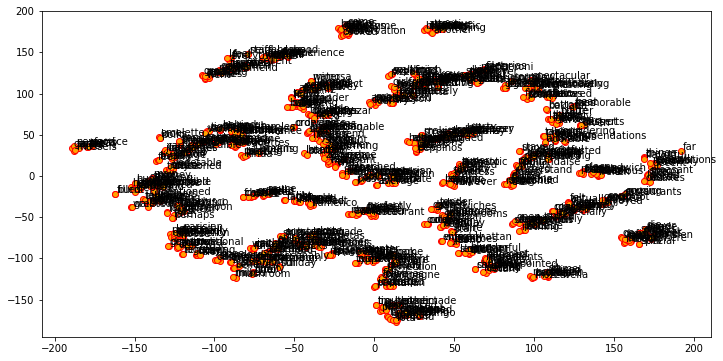

In [55]:
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [79]:
vocabulary = set(wv_model.wv.index2word)

In [80]:
feature_vector = np.zeros((50,),dtype = 'float64')
feature_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
nwords = 0

In [82]:
for word in test['tokens'][0]:
    if word in vocabulary: 
        nwords = nwords + 1.
        feature_vector = np.add(feature_vector, wv_model[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

In [83]:
nwords

14.0

In [85]:
feature_vector

array([ 0.00680978,  0.02863142,  0.02491234,  0.00300421,  0.00101976,
        0.00211124,  0.0513501 ,  0.04621936,  0.01865436,  0.00919763,
        0.02511934, -0.03141848,  0.0071174 , -0.02589453,  0.02085421,
       -0.01495621, -0.00172724,  0.01561895,  0.00686798, -0.02602628,
       -0.005164  ,  0.02208979, -0.02523949, -0.00676602, -0.02396501,
       -0.00712511,  0.00210348,  0.02943241,  0.02243502,  0.00501023,
        0.0819443 , -0.04032518, -0.03715954, -0.01072347, -0.00392682,
       -0.02875105,  0.00780732, -0.00368257,  0.0044252 ,  0.00289896,
        0.00992622, -0.02285132, -0.00904233,  0.05307459, -0.01250566,
        0.0324889 ,  0.01942114, -0.05803864, -0.01804691, -0.00077247])

In [86]:
len(feature_vector)

50

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

In [465]:
vocabulary = set(wv_model.wv.index2word)

In [467]:
len(vocabulary)

7493

In [326]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(check)

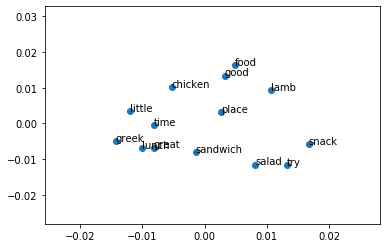

In [331]:
#visualize word vectors
import matplotlib.pyplot as plt
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    words = list(model.wv.vocab)

TSNE - t-distributed stocastic neighbor embedding, a popular dimensionality reduction technique to visualize higher dimension spaces in lower dimensions

### Creating training dataset

In [208]:
from scipy import sparse

In [209]:
test.columns

Index(['ex_id', 'user_id', 'prod_id', 'rating', 'date', 'review', 'length',
       'numbers', 'caps', 'num_sent', 'avg_words', 'perc_tot_user_reviews',
       'my_dates', 'day_of_week', 'month', 'year', 'week_day'],
      dtype='object')

In [210]:
#create training data with old features and new features
num_feats = test[['user_id', 'rating', 'length', 'numbers', 
                  'caps', 'num_sent','avg_words','perc_tot_user_reviews']].values

training_data = sparse.hstack((X_train_binary_Tfidf, num_feats))

### Visulizations
Usually the length of fake review will be on the lesser side because of the following reasons:
- Reviewer will not have much knowledge about the product/business.
- Reviewer tries to achieve the objective with as few words as possible.

In [211]:
import matplotlib.pyplot as plt

In [212]:
import seaborn as sns

In [213]:
testing = train.copy()

In [214]:
addDomainFeatures(testing)

In [215]:
addDateInfo(testing)

In [216]:
testing.head()

,ex_id,user_id,prod_id,rating,label,date,review,length,numbers,caps,num_sent,avg_words,perc_tot_user_reviews,my_dates,day_of_week,month,year,week_day
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...,40,1.0,0.035714,5,4.400000,0.000104,2014-12-08,Monday,12,2014,0
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...,52,0.0,0.028846,5,4.192308,0.000004,2013-05-16,Thursday,5,2013,3
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,32,1.0,0.028986,4,4.593750,0.000008,2013-07-01,Monday,7,2013,0
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...,90,0.0,0.020725,8,4.466667,0.000004,2011-07-28,Thursday,7,2011,3
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...,102,0.0,0.021186,13,4.852941,0.000012,2010-11-01,Monday,11,2010,0


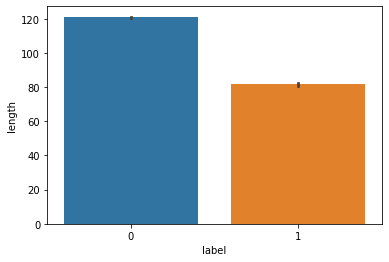

In [223]:
ax = sns.barplot(x="label", y="length", data=testing)

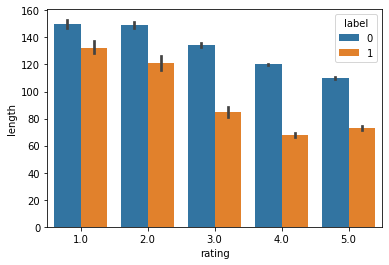

In [224]:
ax = sns.barplot(x="rating", y="length", hue="label", data=testing)

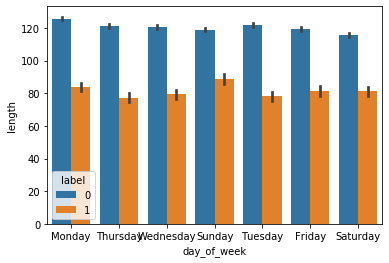

In [225]:
ax = sns.barplot(x="day_of_week", y="length", hue="label", data=testing)

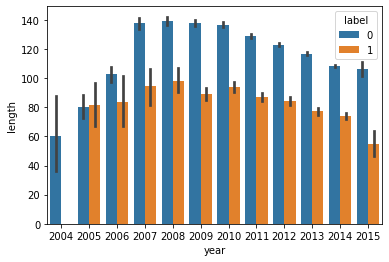

In [226]:
ax = sns.barplot(x="year", y="length", hue="label", data=testing)

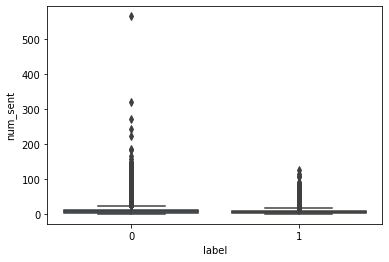

In [227]:
#number of sentences
ax = sns.boxplot(x="label", y="num_sent", data=testing)

In [ ]:
#POS visual

In [ ]:
#word visualization
#scatter plot or line plot 
#userid chart to show why we are including it in the training datatset

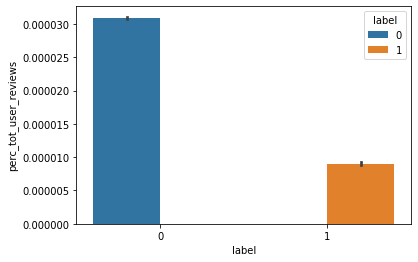

In [218]:
#percent of total user reviews
ax = sns.barplot(x="label", y="perc_tot_user_reviews", hue="label", data=testing)

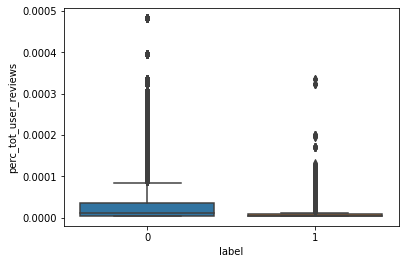

In [219]:
#percent of total user reviews
ax = sns.boxplot(x="label", y="perc_tot_user_reviews", data=testing)

### Imabalanced Classes

SMOTE

### Modeling
Naïve Bayes Classifier, Support Vector
Machines and Logistic Regression classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc

#L O G I S T I C  R E G R E S S I O N 
#CountVectorizer
countvec_LR_model = LogisticRegression()
countvec_LR_model.fit(X_train_binary, Y_train)
countvec_LR_fpr, countvec_LR_tpr, countvec_LR_thresholds = roc_curve(Y_test, countvec_LR_model.predict_proba(X_test_binary)[:,1])
countvec_LR_auc = auc(countvec_LR_fpr, countvec_LR_tpr)

#TfidfVectorizer
Tfidf_LR_model = LogisticRegression()
Tfidf_LR_model.fit(X_train_binary_Tfidf, Y_train)
Tfidf_LR_fpr, Tfidf_LR_tpr, Tfidf_LR_thresholds = roc_curve(Y_test, Tfidf_LR_model.predict_proba(X_test_binary_Tfidf)[:,1])
Tfidf_LR_auc = auc(Tfidf_LR_fpr, Tfidf_LR_tpr)

#B E R N O U L L I  N B 
#CountVectorizer
countvec_NB_model = BernoulliNB()
countvec_NB_model.fit(X_train_binary, Y_train)
countvec_NB_fpr, countvec_NB_tpr, countvec_NB_thresholds = roc_curve(Y_test, countvec_NB_model.predict_proba(X_test_binary)[:,1])
countvec_NB_auc = auc(countvec_NB_fpr, countvec_NB_tpr)

#TfidfVectorizer
Tfidf_NB_model = BernoulliNB()
Tfidf_NB_model.fit(X_train_binary_Tfidf, Y_train)
Tfidf_NB_fpr, Tfidf_NB_tpr, Tfidf_NB_thresholds = roc_curve(Y_test, Tfidf_NB_model.predict_proba(X_test_binary_Tfidf)[:,1])
Tfidf_NB_auc = auc(Tfidf_NB_fpr, Tfidf_NB_tpr)